# Basic Sentiment Analysis

We count 'positive' and 'negative' words and use differences or ratios or windowed averages as a measure of sentiment.   This is highly problematic!


* This food is not very good! (Negation)
* This lavishly produced movie was blllleeeeccchhh! (Unknown words)
* Professor Muzny is the GOAT. (slang)
* Sure I enjoyed my visit to this air bnb but then again I really enjoy the stacatto thrum of jack hammers at 4am. (Sarcasm)

In [1]:
# Read a list of words
def read_words(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    return set([w.strip() for w in lines])

pos = read_words('positive-words.txt')
neg = read_words('negative-words.txt')

print(list(pos)[:20])
print(list(neg)[:20])

['support', 'rational', 'unselfish', 'miraculousness', 'nicest', 'tidy', 'regal', 'precious', 'abundance', 'frolic', 'reward', 'sophisticated', 'fortitude', 'intriguing', 'problem-solver', 'easiness', 'faithful', 'glorify', 'loves', 'breakthroughs']
['disrupt', 'condemnable', 'dirts', 'heavyhearted', 'alarmingly', 'farcical-yet-provocative', 'polemize', 'spookiest', 'flout', 'steep', 'fret', 'incite', 'sly', 'helplessness', 'fake', 'beguile', 'mope', 'improbable', 'smuttier', 'unfavorable']


In [2]:
# Read and clean some raw text
def text_to_words(filename):
    """ Convert everything to lower case. Remove punctuation,
    new lines, and extra white space """

    non_letters = "0123456789!@#$%^&*()_+-=';:.,></?\""
    
    with open(filename, 'r') as file:
        text = file.read()
    
    text = text.lower()
    for char in non_letters:
        text = text.replace(char, '')

    text = text \
        .replace("\n", " ") \
        .replace("\t", " ") \
        .replace("  ", " ")  # remove extra whitespace
    return text.split()

limit = 50000 # Number of words to extract from text files
obama = text_to_words('obama.txt')[:limit]
trump = text_to_words('trump.txt')[:limit]

In [3]:
import dataproc as dp
limit = 50000
obama_txt = dp.read_text('obama.txt')
obama = dp.text_to_words(obama_txt)[:limit]

trump_txt = dp.read_text('trump.txt')
trump = dp.text_to_words(trump_txt)[:limit]

print(trump[:25], len(trump))
print(obama[:25], len(obama))



['thank', 'you', 'so', 'much', 'thats', 'so', 'nice', 'isnt', 'he', 'a', 'great', 'guy', 'he', 'doesnt', 'get', 'a', 'fair', 'press', 'he', 'doesnt', 'get', 'it', 'its', 'just', 'not'] 50000
['to', 'chip', 'kathy', 'and', 'nancy', 'who', 'graciously', 'shared', 'your', 'father', 'with', 'a', 'nation', 'that', 'loved', 'him', 'to', 'walters', 'friends', 'colleagues', 'protégés', 'and', 'all', 'who', 'considered'] 50000


In [4]:
def sentiment(words):
    """ convert word list to list of -1, 0, 1
    for negative, neutral, positive words """
    sent = []
    for word in words:
        if word in pos:
            sent.append(1)
        elif word in neg:
            sent.append(-1)
        else:
            sent.append(0)
    return sent




In [5]:
def score_word(word):
    if word in pos:
        return 1
    elif word in neg:
        return -1
    else:
        return 0
    
def sentiment(words):
    return [score_word(w) for w in words]
    

In [6]:
sent_obama = sentiment(obama)
sent_trump = sentiment(trump)

print(sum(sent_obama)/limit, sum(sent_trump)/limit)
print("obama:", sent_obama.count(-1), sent_obama.count(0), sent_obama.count(1))
print("trump:", sent_trump.count(-1), sent_trump.count(0), sent_trump.count(1))


0.0146 0.01722
obama: 1302 46666 2032
trump: 1315 46509 2176


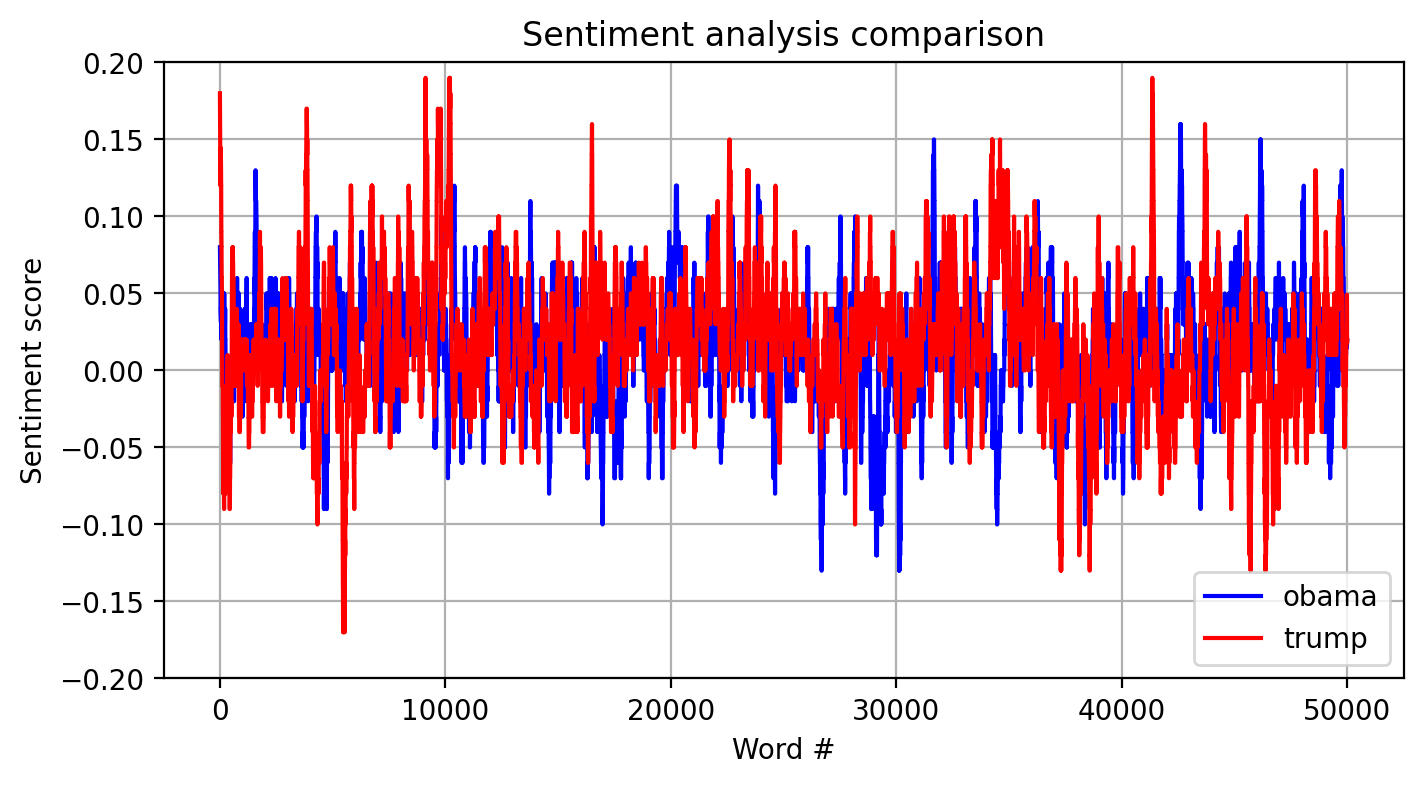

In [7]:
import matplotlib.pyplot as plt
import dataproc as dp

def plot_sentiment(sent1, sent2, labels=["1", "2"]):
    
    sz = 100
    mavg1 = dp.moving_average(sent1, window_size=sz)
    mavg2 = dp.moving_average(sent2, window_size=sz)
    #plt.scatter(range(len(sent)),sent, marker='.')
    plt.figure(figsize=(8,4), dpi=200)
    plt.plot(mavg1, label=labels[0], color='b')
    plt.plot(mavg2, label=labels[1], color='r')
    plt.title("Sentiment analysis comparison")
    plt.xlabel("Word #")
    plt.ylabel("Sentiment score")
    plt.ylim(-0.2, 0.2)
    # plt.xlim(34000, 35000)
    plt.grid()
    plt.legend()
    plt.savefig('sentiment.png')
    plt.show()

plot_sentiment(sent_obama, sent_trump, labels=['obama', 'trump'])

In [8]:
print('obama avg wordsize: ', dp.avg([len(w) for w in obama]))
print('trump avg wordsize: ', dp.avg([len(w) for w in trump]))

obama avg wordsize:  4.5579
trump avg wordsize:  4.19308


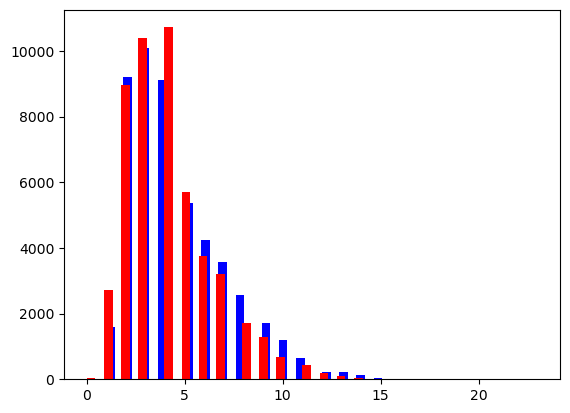

In [11]:
obama_len = [len(w) for w in obama]
trump_len = [len(w) for w in trump]
bins = 50
plt.hist(obama_len, bins=bins, color='b')
plt.hist(trump_len, bins=bins, color='r')
plt.show()

In [10]:
# counting words
from collections import Counter

min_length = 9
obama_big = [w for w in obama if len(w) >= min_length]
trump_big = [w for w in trump if len(w) >= min_length]

obama_count = Counter(obama_big)
trump_count = Counter(trump_big)

print(obama_count.most_common(10))
print()
print(trump_count.most_common(10))

[('president', 61), ('americans', 54), ('government', 48), ('challenges', 40), ('community', 38), ('information', 37), ('education', 36), ('responsibility', 32), ('administration', 31), ('guantanamo', 29)]

[('president', 106), ('something', 61), ('immigration', 58), ('everybody', 57), ('thousands', 44), ('countries', 32), ('terrorism', 31), ('tremendous', 29), ('incredible', 29), ('americans', 29)]
